In [142]:
#The Libraries that we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [143]:
# Getting the file from goggle drive
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/HW1.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [144]:
df.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [145]:
#x1, x2, and x3
x1 = df.values[:, 0]
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3]
m = len(y)


In [146]:
#The cost Function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [147]:
#The Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [148]:
#Training and plotting
def train_and_plot(x, y, alpha, iterations, label):
    X_0 = np.ones((m, 1))
    X_1 = x.reshape(m, 1)
    X = np.hstack((X_0, X_1))
    theta = np.zeros(2)


    print(f"Initial cost for {label}:", compute_cost(X, y, theta))


    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    print(f"Final theta for {label}:", theta)
    print(f"Final cost for {label}:", compute_cost(X, y, theta))


    plt.figure()
    plt.scatter(x, y, color='blue', marker='+', label='Training Data')
    plt.plot(x, X.dot(theta), color='red', label='Linear Regression')
    plt.xlabel(label)
    plt.ylabel('Y')
    plt.title(f'Linear Regression using {label}')
    plt.legend()
    plt.show()


    plt.figure()
    plt.plot(range(1, iterations + 1), cost_history, color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost J')
    plt.title(f'Cost Convergence using {label}')
    plt.show()

    return theta, compute_cost(X, y, theta)

Initial cost for x1: 5.524438459196242
Final theta for x1: [ 5.71850653 -1.9568206 ]
Final cost for x1: 0.9905894438682062


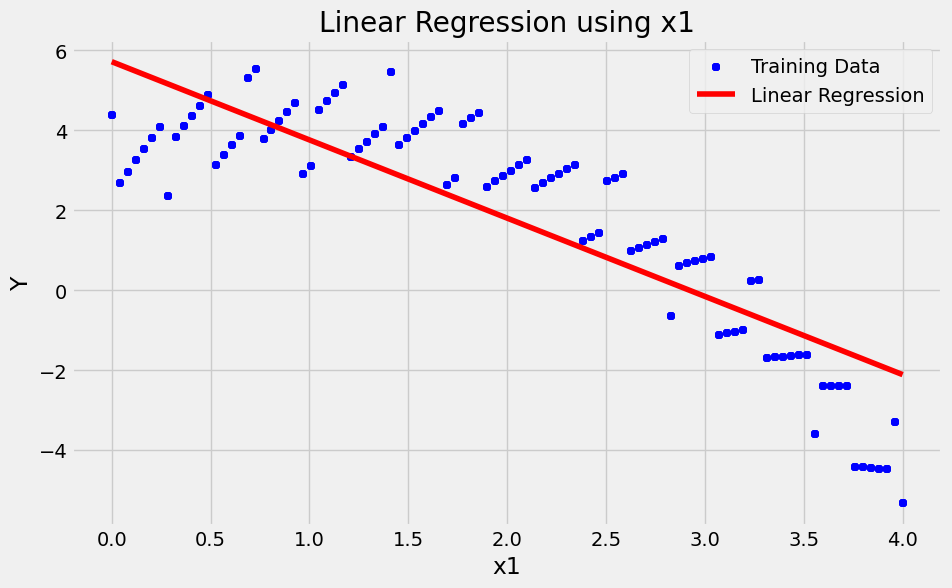

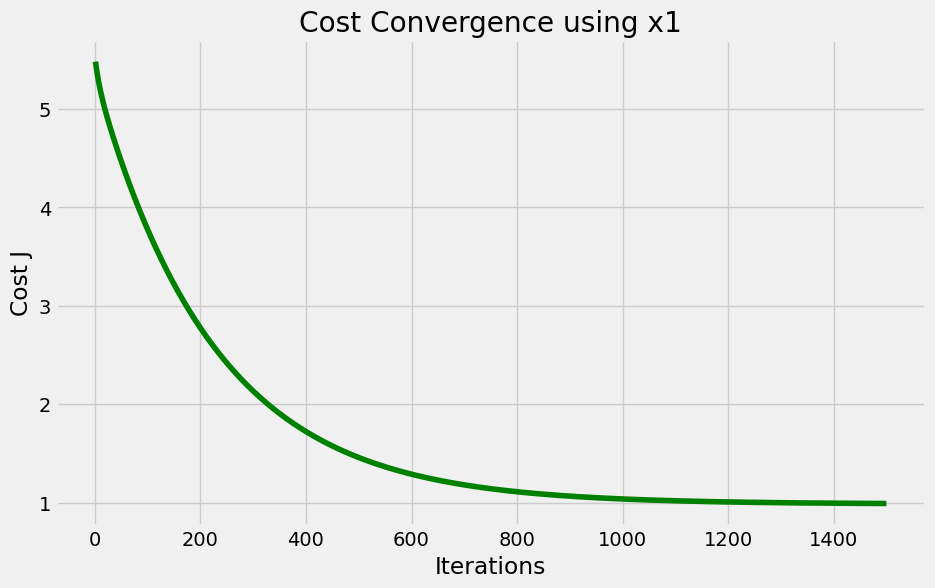

Initial cost for x2: 5.524438459196242
Final theta for x2: [0.71988473 0.56390334]
Final cost for x2: 3.5993993982305357


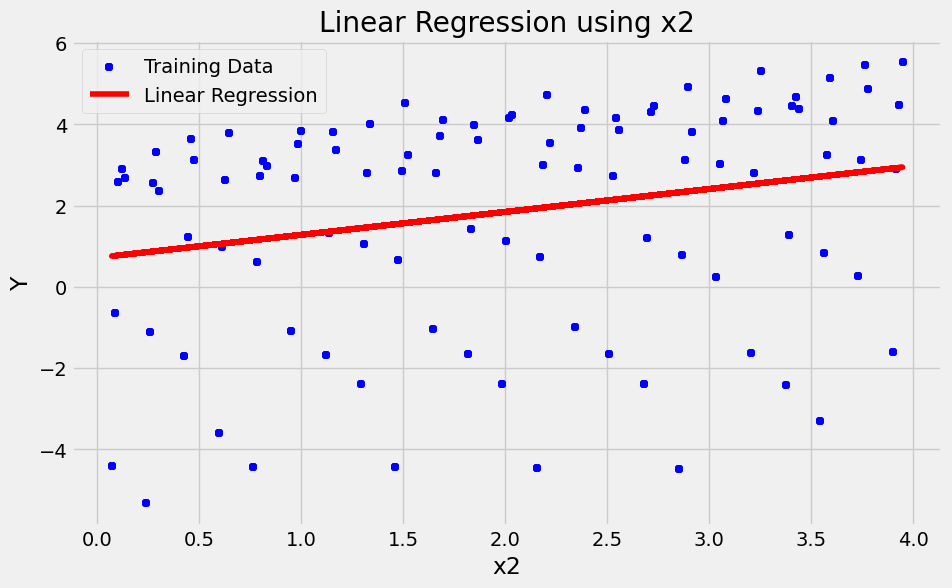

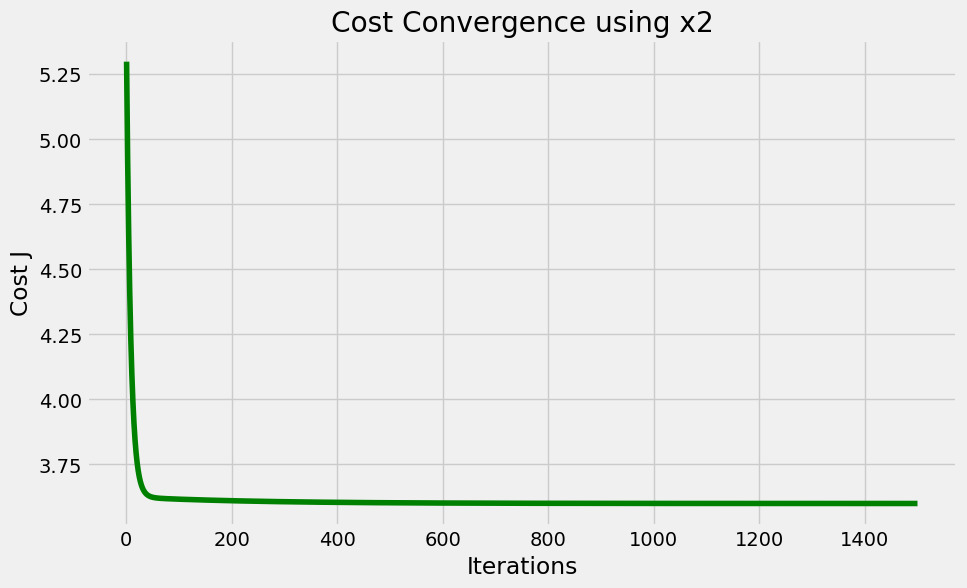

Initial cost for x3: 5.524438459196242
Final theta for x3: [ 2.78048129 -0.48451631]
Final cost for x3: 3.6305262475389664


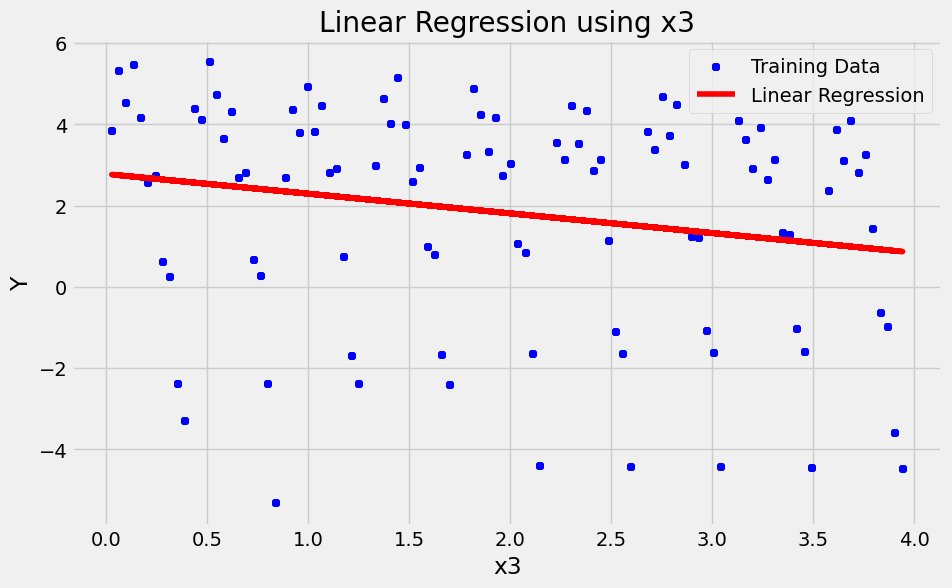

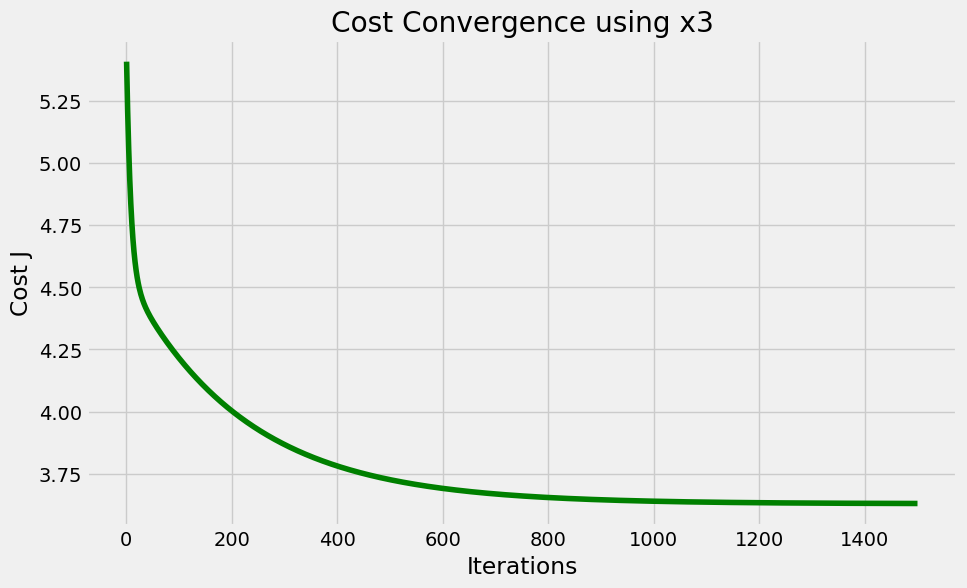


--- Final Costs ---
x1 cost: 0.9905894438682062
x2 cost: 3.5993993982305357
x3 cost: 3.6305262475389664

🔍 Best variable for prediction is x1 with cost = 0.9905894438682062


In [149]:
#Training on x1, x2, x3
alpha = 0.01
iterations = 1500

theta1, cost1 = train_and_plot(x1, y, alpha, iterations, "x1")
theta2, cost2 = train_and_plot(x2, y, alpha, iterations, "x2")
theta3, cost3 = train_and_plot(x3, y, alpha, iterations, "x3")

#See which variable is best
print("\n--- Final Costs ---")
print(f"x1 cost: {cost1}")
print(f"x2 cost: {cost2}")
print(f"x3 cost: {cost3}")

best = min((cost1, "x1"), (cost2, "x2"), (cost3, "x3"))
print(f"\n🔍 Best variable for prediction is {best[1]} with cost = {best[0]}")